# Process projected data

Data in `banane_springback_node_mappedz_results.zip`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [2]:
df_parameters = pd.read_csv("../data/doe.csv", index_col=False)
df_parameters.keys()
df_parameters

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.00,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
1,2,5,1.48,400,2.4,3,-4,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
2,3,1,1.00,210,2.4,3,-1,70,70.2,1.71,2.00,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
3,4,2,1.19,390,2.4,3,5,30,70.2,1.71,2.00,200.03813,DC01_1.20mm,160.714935,174.535075,564.455438,424.931018,490.442223
4,5,1,1.00,360,1.6,2,3,30,71.8,1.14,1.33,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,1.01,90,1.6,2,0,70,71.8,1.14,1.33,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
996,997,4,0.99,480,2.4,3,5,30,70.2,1.71,2.00,71.94184,AA5083_1.00mm,248.796491,251.315902,385.373316,371.774337,384.299873
997,998,5,1.48,490,2.4,3,3,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
998,999,5,1.48,120,2.4,3,-3,30,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834


In [4]:
right_edge = [    
           21,   1006,   1007,   1008,   1009,   1010,   1011,   1012,
         1013,   1014,   1015,   1016,   1017,   1018,   1019,   1020,
         1021,   1022,   1023,   1024,   1025,   1026,   1027,   1028,
         1029,   1030,     19, 181188, 181189, 181190, 181191, 181192,
           17,    804,    805,    806,    807,    808,    809,    810,
          811,    812,    813,    814,    815,    816,    817,    818,
          819,    820,    821,    822,    823,     12, 171439, 171440,
       171441,     13,   1121,   1120,   1119,   1118,   1117,   1116,
         1115,   1114,   1113,   1112,   1111,   1110,   1109,   1108,
         1107,   1106,   1105,   1104,   1103,   1102,   1101,   1100,
         1099,   1098,   1097,   1096,   1095,   1094,   1093,   1092,
         1091,   1090,   1089,      9, 171117, 171118, 171119,      7,
          366,    367,    368,    369,    370,    371,    372,    373,
          374,    375,    376,    377,    378,    379,    380,    381,
          382,    383,    384,    385,      4, 180541, 180542, 180543,
       180544, 180545,      1,    206,    207,    208,    209,    210,
          211,    212,    213,    214,    215,    216,    217,    218,
          219,    220,    221,    222,    223,    224,    225,    226,
          227,    228,    229,    230,      5]

In [5]:
df = pd.DataFrame()

for f in sorted(os.listdir("../data/banane_node_mappedz_results")):

    # Get index
    idx_string = f[-7:-3]
    idx = int(idx_string)

    # Open the file
    with pd.HDFStore('../data/banane_node_mappedz_results/' + f, mode="r") as store:
        data = store['/node/doeid_' + idx_string + '/nodes']

        data = data[~data['nid'].isin(right_edge)]
        
        data.insert(0, "doe_id", idx)

        df = pd.concat([df, data])

df.to_csv("../data/projection.csv", index=False)
df

,doe_id,nid,x,y,z,deviation,xp,yp,zt,thickness,epseqpl
nidx,,,,,,,,,,,
1,1,2,0.000004,42.424225,-33.0000,-0.204964,-14.477250,75.39872,-53.0000,0.971030,0.071798
2,1,3,0.000004,37.424225,-28.0000,-0.202234,-13.429390,67.66225,-48.0000,0.934250,0.115493
5,1,6,0.000004,94.940025,-33.0000,-0.900430,-22.669640,126.95540,-53.0000,1.001370,NaN
7,1,8,0.000004,37.424225,-6.0000,-2.031673,-8.459759,25.83435,-6.0000,0.942991,0.070657
9,1,10,0.000004,34.424225,-3.0000,-1.046308,-7.805998,21.19728,-3.0000,0.935201,0.101242
...,...,...,...,...,...,...,...,...,...,...,...
12064,1000,181829,2.003804,-37.761925,-69.2934,4.090118,9.278828,-93.38924,-49.2934,1.462319,0.104193
12065,1000,181830,2.002079,-38.264335,-70.4967,4.128832,9.417444,-94.67548,-50.4967,1.467245,0.086132
12066,1000,181831,1.999373,-39.057515,-71.5316,-4.007711,9.560166,-95.96204,-51.5316,1.467844,0.085275


Remove nodes on the border to avoid side effects

In [11]:
prune_zt30 = [
        21519, 15464,  1731, 15434, 21440, 21510,   200, 15400, 15422,
        11045, 21449, 15442, 15438, 11114,  3188, 21462,   188,  7113,
        7128,  7144,  7124,  7140,  7116,  7120,  7132,  7136,  7148,
        7332,  1919, 15557,  1726,  1723, 11055, 11059, 11051, 11048,
        15488, 15483, 21480, 15385, 15363, 21427, 26539,  3209, 15547,
        11067, 11071, 11061, 11064, 21526, 21534, 15515, 15461, 15458,
        15403, 15409, 15426, 15430, 15447, 15453, 15478, 21501,  1718,
        11083, 11086, 21437, 11080, 11075,  3212,  3379, 15469, 15476,
        11015, 10988, 15493, 15498, 21543, 21552,  3197,  3192, 15523,
        15528, 21444, 21447, 15390, 15396, 11107, 11101, 11096, 11091,
        204,   208, 21452, 21456, 11027, 11024,   212,   403, 11019,
        11022, 21563, 21576, 15413, 15417, 21593,  1714,   193,   196,
        21467, 21474,  1706,  1710,  3200,  3204, 11042, 11038, 11031,
        11035, 21431, 21434, 15504, 15508, 15533, 15539, 21487, 21492,
        26740, 21494, 26665, 10938, 26538, 26524, 26520, 15225, 15243,
        21516, 10976, 15264, 11033, 10945,  1721, 26703, 15103, 21586,
        11001, 21496, 21542, 21601, 15266, 10984, 26738, 21599, 26525,
        15216, 21471, 21349, 26668, 21623, 26530, 21597, 26743, 11009,
        10936, 15276, 21593, 21595, 21551,  1717, 26693, 21426, 21376,
        21605, 21603, 21545, 21352, 21498, 21560, 10964, 21518, 10952,
        26751, 10907, 26723,  3198,  3194, 15219, 15232, 10974, 26700,
        21469,  4525, 21569, 15227,     0,  7002,  7126,  7142,  7122,
        7138,  7114,  7118,  7130,  7134,  7146,  7150, 26697, 21473,
        21484, 15221, 20563, 15466, 15462, 21523, 15260, 21613, 10995,
        26726, 26728, 10999, 10997, 21451, 26523, 21429, 10934, 21380,
        21584, 21355,  3202,   214,  1732, 15473, 15440, 10943, 20560,
        11007, 15445, 26758, 20262, 15450, 11052, 26736, 21558, 10982,
        10993, 10991, 21500, 15234, 10959, 21629, 26536, 26709, 21503,
        21621, 20261, 10961, 20558, 15435, 15432, 11049, 21486, 15274,
        21565, 21567, 21592, 10987, 10989, 21454, 21505, 21525, 15401,
        26733, 15406, 26518, 10955, 15104, 10963, 15419, 15415, 11039,
        1713,   198,   202, 21372, 26673, 10947,  4518,  4523,  4527,
        4538,  4711,  4543,  4531,  4535,  9193,  9209,  9225,  9205,
        9221,  9197,  9201,  9213,  9217,  9328,  9229, 26756, 10950,
        20550, 26532, 15384,  1521,  1709, 15387, 21529, 15229, 10903,
        10940, 10932, 20552, 20260, 15237, 15223, 10923, 15281, 15107,
        11036, 15286, 11056, 10928, 10901, 10972, 15214, 21611, 26526,
        26519, 20259, 26528, 21580, 21582, 10942, 26716, 26714, 11003,
        11005,  3190,  3024, 10933, 15248, 15335, 15334, 21575, 10978,
        10980, 21554, 21556, 26717, 26535, 21491, 21489, 26690,  4529,
        4533, 15258, 10949, 21507, 26675, 21619, 26537, 26671, 11028,
        11025,  1725,  1729, 10956, 10957,  3210,  3206,   194,   190,
        206,   210, 15323, 21625, 21627, 10914, 10910, 20258, 15326,
        21588, 21590, 11011, 15212, 15268, 15271, 21562, 26731, 21479,
        21477, 21460, 21460, 21512, 21514, 15284, 15108, 21533, 21531,
        20251, 15288, 15109, 15304,  4537,  4541, 20253, 15313, 15309,
        10906, 10901, 26753, 26754, 15218, 15254, 15240, 10922, 21442,
        21439, 11016, 11013, 20256, 20529, 10911, 15224, 26694, 21466,
        3214,  9072,  9207,  9223,  9203,  9219,  4544,  9195,  9199,
        9211,  9215,  9227,  9231,  4353,  4521, 21400, 21395, 15411,
        20555, 26745, 26747, 26706, 21509, 21366, 21360, 15245, 10927,
        10898, 10899, 15279, 10971, 21540, 21538, 10916, 10917, 21571,
        21573, 21615, 21617, 10966, 10968, 21607, 21609, 21547, 21549
]

prune_zt50 = [
              1,   181,   183,   185,   187,   189,   191,   193,   195,
              197,   199,   201,   203,   205,   207,   386,  1456,  1636,
              1638,  1640,  1642,  1644,  1646,  1648,  1650,  1652,  1654,
              1656,  1658,  1660,  1662,  1843,  2912,  3072,  3074,  3076,
              3078,  3080,  3082,  3084,  3086,  3088,  3090,  3092,  3094,
              3096,  3098,  3259,  4209,  4367,  4369,  4371,  4373,  4375,
              4377,  4379,  4381,  4383,  4385,  4387,  4389,  4391,  4393,
              4550,  6744,  6922,  6924,  6926,  6928,  6930,  6932,  6934,
              6936,  6938,  6940,  6942,  6944,  6946,  6948,  6950,  6952,
              6954,  6956,  6958,  6960,  6962,  6964,  6966,  6968,  6970,
              6972,  6974,  6976,  6978,  6980,  6982,  6984,  6986,  6988,
              6990,  6992,  6994,  6996,  6998,  7000,  7178, 10527, 10683,
              10685, 10687, 10689, 10691, 10693, 10695, 10697, 10699, 10701,
              10703, 10705, 10707, 10709, 10711, 10713, 10715, 10717, 10719,
              10721, 10723, 10725, 10727, 10729, 10731, 10733, 10735, 10737,
              10739, 10741, 10743, 10745, 10747, 10749, 10751, 10753, 10755,
              10757, 10759, 10761, 10919, 13894, 13905, 13910, 13913, 13926,
              13937, 13956, 13972, 13974, 14000, 14002, 14004, 14006, 14009,
              14010, 14012, 14014, 14016, 14018, 14021, 14022, 14024, 14026,
              14028, 14030, 14030, 14032, 14035, 14036, 14039, 14040, 14043,
              14044, 14047, 14048, 14050, 14053, 14054, 14056, 14059, 14060,
              14062, 14064, 14066, 14069, 14070, 14072, 14075, 14076, 14078,
              14081, 14082, 14084, 14086, 14089, 14090, 14092, 14094, 14097,
              14098, 14100, 14102, 14104, 14106, 14108, 14110, 14112, 14114,
              14117, 14118, 14120, 14122, 14124, 14126, 14128, 14130, 14132,
              14134, 14136, 14138, 14140, 14140, 14142, 14144, 14146, 14148,
              14150, 14152, 14154, 14156, 14158, 14160, 14162, 14164, 14166,
              14168, 14170, 14172, 14174, 18781, 18782, 18786, 18788, 18790,
              18792, 18794, 18795, 18799, 18801, 18803, 18805, 18807, 18809,
              18811, 18901, 18909, 18911, 18917, 18918, 18923, 18925, 18926,
              18927, 18930, 18936, 18937, 18938, 18941, 18944, 18947, 18953,
              18954, 18958, 18959, 18963, 18964, 18965, 18968, 18973, 18975,
              18979, 18980, 18984, 18985, 18986, 18990, 18991, 18993, 18996,
              18998, 19000, 19002, 19004, 19009, 19016, 19023, 19028, 19043,
              19058, 19069, 19100, 19102, 19113, 19114, 19115, 19118, 19120,
              19122, 19125, 19126, 19129, 19131, 19133, 19135, 19138, 19139,
              19143, 19147, 19149, 19151, 19153, 19155, 19157, 19161, 19163,
              19166, 19167, 19169, 19173, 19175, 19177, 19181, 19185, 19191,
              19195, 19200, 19204, 19208, 19219, 19237, 19245, 19251, 19257,
              19269, 19283, 23471, 23475, 23478, 23565, 23638, 23783, 23789,
              23792, 23796, 23810, 23813, 23817, 23820, 23821, 23833, 23834,
              23848, 23849, 23856, 23857, 23857, 23859, 23861, 23862, 23865,
              23866, 23869, 23871, 23872, 23874, 23877, 23878, 23880, 23883,
              23885, 23886, 23888, 23891, 23892, 23894, 23896, 23898, 23900,
              23902, 23904, 23906, 23908, 23910, 23912, 23914, 23917, 23918,
              23920, 23922, 23924, 23926, 23928, 23930, 23932, 23934, 23936,
              23938, 23940, 23942, 23944, 23946, 23948, 23951, 23952, 23954,
              23956, 23958, 23961, 23962, 23964, 23966, 23968, 23970, 23974,
              23976, 23978, 23982, 23986, 23992, 23998, 24002, 24006, 24012,
              24020, 24030, 24040, 24052, 27679, 27681, 27683, 27685, 27686,
              27690, 27692, 27694, 27696, 27698, 27700, 27702, 27703, 27707,
              27709, 27795, 27796, 27797, 27800, 27803, 27806, 27809, 27812,
              27815, 27818, 27822, 27823, 27828, 27829, 27831, 27832, 27835,
              27837, 27838, 27842, 27844, 27845, 27849, 27851, 27853, 27854,
              27859, 27861, 27863, 27865, 27867, 27869, 27871, 27872, 27877,
              27880, 27882
]

prune_zt70 = [    
              0,   180,   182,   184,   186,   189,   190,   193,   194,
              196,   198,   201,   202,   204,   206,   387,  1457,  1636,
              1639,  1640,  1643,  1645,  1647,  1648,  1651,  1653,  1655,
              1656,  1659,  1661,  1662,  1843,  2913,  3072,  3075,  3076,
              3079,  3080,  3083,  3085,  3087,  3088,  3091,  3092,  3095,
              3097,  3098,  3259,  4208,  4366,  4368,  4371,  4372,  4374,
              4376,  4379,  4380,  4382,  4384,  4386,  4388,  4391,  4392,
              4551,  6728,  6833,  6834,  6836,  6838,  6840,  6842,  6844,
              6846,  6848,  6850,  6852,  6854,  6856,  6858,  6860,  6862,
              6864,  6866,  6868,  6870,  6872,  6874,  6876,  6878,  6880,
              6882,  6884,  6886,  6888,  6890,  6892,  6894,  6896,  6898,
              6900,  6902,  6904,  6906,  6908,  6910,  6912,  6914,  6916,
              6918,  6920,  6922,  6924,  6926,  6928,  6930,  6932,  6934,
              6936,  6938,  6940,  6942,  6944,  6946,  6948,  6950,  7048,
              12311, 12424, 12426, 12428, 12430, 12432, 12434, 12436, 12438,
              12440, 12442, 12444, 12446, 12448, 12450, 12452, 12454, 12456,
              12458, 12460, 12462, 12464, 12466, 12468, 12470, 12472, 12474,
              12476, 12478, 12480, 12482, 12484, 12486, 12488, 12490, 12492,
              12494, 12496, 12499, 12500, 12503, 12504, 12506, 12508, 12510,
              12512, 12514, 12516, 12518, 12520, 12522, 12524, 12526, 12528,
              12530, 12532, 12534, 12536, 12538, 12540, 12542, 12634, 17273,
              17275, 17277, 17286, 17287, 17300, 17304, 17310, 17314, 17320,
              17332, 17352, 17354, 17355, 17357, 17359, 17362, 17363, 17365,
              17366, 17368, 17370, 17373, 17376, 17378, 17379, 17381, 17383,
              17386, 17390, 17391, 17395, 17396, 17398, 17400, 17402, 17403,
              17406, 17408, 17409, 17413, 17415, 17416, 17419, 17421, 17422,
              17425, 17427, 17428, 17431, 17433, 17434, 17438, 17440, 17441,
              17445, 17447, 17449, 17450, 17454, 17456, 17458, 17459, 17461,
              17462, 17464, 17466, 17468, 17469, 17471, 17473, 17475, 17477,
              17479, 17480, 17484, 17486, 17488, 17490, 17492, 17493, 17495,
              17497, 17499, 17501, 17503, 17505, 17507, 17508, 17508, 17510,
              17512, 17514, 17516, 17518, 17520, 17522, 17524, 17526, 17528,
              17530, 17532, 17534, 17536, 17538, 17540, 17542, 17544, 22159,
              22160, 22161, 22162, 22164, 22164, 22165, 22166, 22168, 22170,
              22171, 22172, 22173, 22174, 22175, 22176, 22177, 22178, 22310,
              22312, 22315, 22321, 22324, 22326, 22327, 22329, 22332, 22335,
              22338, 22341, 22347, 22351, 22355, 22356, 22359, 22364, 22366,
              22369, 22371, 22374, 22376, 22379, 22381, 22383, 22387, 22388,
              22390, 22393, 22399, 22402, 22408, 22412, 22426, 22431, 22460,
              22461, 22464, 22471, 22473, 22475, 22477, 22478, 22481, 22484,
              22487, 22488, 22490, 22491, 22494, 22496, 22498, 22500, 22502,
              22506, 22509, 22511, 22514, 22516, 22518, 22520, 22523, 22526,
              22528, 22530, 22531, 22533, 22536, 22539, 22542, 22546, 22549,
              22553, 22556, 22561, 22565, 22568, 22576, 22586, 22591, 22598,
              22602, 22609, 22616, 26818, 26819, 26820, 26821, 26823, 26947,
              27050, 27189, 27195, 27197, 27213, 27215, 27218, 27228, 27239,
              27244, 27246, 27246, 27247, 27250, 27251, 27254, 27256, 27260,
              27261, 27266, 27267, 27269, 27270, 27271, 27275, 27277, 27278,
              27283, 27284, 27285, 27287, 27290, 27291, 27292, 27294, 27296,
              27298, 27300, 27301, 27303, 27305, 27307, 27310, 27311, 27313,
              27315, 27317, 27320, 27321, 27323, 27325, 27327, 27329, 27331,
              27333, 27335, 27337, 27339, 27340, 27343, 27345, 27346, 27348,
              27349, 27352, 27355, 27358, 27359, 27361, 27362, 27365, 27368,
              27370, 27371, 27373, 27374, 27377, 27380, 27383, 27385, 27388,
              27391, 27395, 27401, 27406, 27409, 27413, 27418, 27424, 27430,
              27436, 31071, 31073, 31075, 31076, 31077, 31079, 31082, 31083,
              31084, 31085, 31086, 31087, 31088, 31091, 31092, 31199, 31200,
              31201, 31204, 31208, 31211, 31214, 31215, 31219, 31220, 31223,
              31228, 31229, 31232, 31234, 31239, 31242, 31245, 31247, 31250,
              31252, 31254, 31256, 31258, 31260, 31262, 31266, 31268, 31271
]
              

In [18]:
df = pd.DataFrame()

for f in sorted(os.listdir("../data/banane_node_mappedz_results")):

    # Get index
    idx_string = f[-7:-3]
    idx = int(idx_string)
    print(idx)

    # get parameters
    zt = int(df_parameters[df_parameters['doe_id'] == idx]['Ziehtiefe'][0])
    print(zt)

    # Open the file
    with pd.HDFStore('../data/banane_node_mappedz_results/' + f, mode="r") as store:
        data = store['/node/doeid_' + idx_string + '/nodes']
        
        data.insert(0, "doe_id", idx)

        df = pd.concat([df, data])

    break

df

1
30


,doe_id,nid,x,y,z,deviation,xp,yp,zt,thickness,epseqpl
nidx,,,,,,,,,,,
0,1,1,178.844904,12.096795,-33.0000,-0.422629,171.242500,81.12756,-53.0000,0.974652,0.054724
1,1,2,0.000004,42.424225,-33.0000,-0.204964,-14.477250,75.39872,-53.0000,0.971030,0.071798
2,1,3,0.000004,37.424225,-28.0000,-0.202234,-13.429390,67.66225,-48.0000,0.934250,0.115493
3,1,4,177.490304,7.273645,-28.0000,-0.335761,170.959500,73.34183,-48.0000,0.947184,0.098121
4,1,5,193.068604,62.741605,-33.0000,-0.980137,173.356600,133.80950,-53.0000,0.999883,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12064,1,181829,2.003804,-37.761925,-29.2934,0.232259,9.278828,-93.38924,-49.2934,0.922656,0.097336
12065,1,181830,2.002079,-38.264335,-30.4967,-0.104293,9.417444,-94.67548,-50.4967,0.927073,0.088303
12066,1,181831,1.999373,-39.057515,-31.5316,0.246731,9.560166,-95.96204,-51.5316,0.928486,0.086905


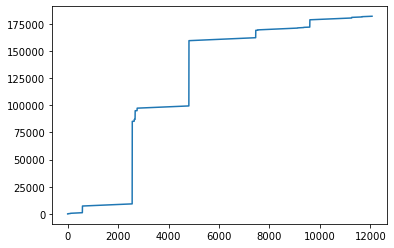

In [19]:
x = df['nid'].to_numpy()

plt.plot(x)